 % bb
 % Args:
 % Phase 1: 0.00 seconds

%%BeginSetup

10 20 10 20 SetAxes

4 DefineTerminals
	10.000000000000000	10.000000000000000	DT
	10.000000000000000	20.000000000000000	DT
	20.000000000000000	10.000000000000000	DT
	20.000000000000000	20.000000000000000	DT

%%EndSetup


 % Certificate of solution:
 % @C	17.113248654051873	15.000000000000000
 % @C	12.886751345948128	15.000000000000000
%%Page: 1 1
BeginPlot
	Plot_Terminals
 % fs4: 3 2 0 1
	3 T	17.113248654051873	15.000000000000000	S
	17.113248654051873	15.000000000000000	2 T	S
	17.113248654051873	15.000000000000000	12.886751345948128	15.000000000000000	S
	12.886751345948128	15.000000000000000	0 T	S
	12.886751345948128	15.000000000000000	1 T	S
  (Euclidean SMT:  4 points,  length = 27.320508075688771,  0.00 seconds)
EndPlot

% @0 Euclidean SMT
% N M Nodes LPs P1CPU P2CPU TotCPU
% @1 4 8 0 0 0.00 0.00 0.00
% Z RootZ %Gap RootLPs RootCPU RedMST
% @2 27.320508075688771 - - 0 0.00 8.9316
% InitPRows InitPNZ InitLPRows InitLPNZ
% @3 0 0 0

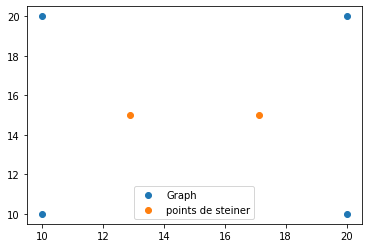

[[('20.000000000000000', '20.000000000000000'), (17.113248654051873, 15.0)],
 [(17.113248654051873, 15.0), ('20.000000000000000', '10.000000000000000')],
 [(12.886751345948127, 15.0), ('10.000000000000000', '10.000000000000000')],
 [(12.886751345948127, 15.0), ('10.000000000000000', '20.000000000000000')]]

In [1]:
from EST2D import EST2D

estprob = EST2D("square.tsp")
estprob.solve()
# estprob.draw()
estprob.plot_steiner_tree()
estprob.distance
estprob.connections

In [2]:
import re

def extract_connections(input_text):


    plot_text = re.search(r"BeginPlot(.*?)EndPlot", input_text, re.DOTALL).group(1)
    lines = plot_text.strip().split('\n')

    # Initialize a list to store the connections
    connections = []

    # Regular expression to match the lines with connections
    connection_pattern = re.compile(r"(\d+ T)\s+([\d.]+)\s+([\d.]+)|([\d.]+)\s+([\d.]+)\s+(\d+ T)")

    for line in lines:
        # Check if line matches the connection pattern
        match = connection_pattern.findall(line)
        for m in match:
            if m[0]:  # If the first group is not empty, format is "ID, x, y"
                connections.append([m[0], (float(m[1]), float(m[2]))])
            else:  # Format is "x, y, ID"
                connections.append([(float(m[3]), float(m[4])), m[5]])




    for i, connection in enumerate(connections):
        for j, point in enumerate(connection):
            if 'T' in  point:
                print(point)
                connections[i][j] = estprob.terminals[int(point[0])]
extract_connections()
print(estprob.connections)

TypeError: extract_connections() missing 1 required positional argument: 'input_text'